<a href="https://colab.research.google.com/github/vijays4404/TimeSeries/blob/main/inventory_summation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np

In [99]:
inventory_current = pd.read_excel('/content/Inventory Dataset.xlsx', sheet_name='Sheet1')
inventory_upcoming = pd.read_excel('/content/New Inventory.xlsx', sheet_name='Sheet3')


In [100]:
inventory_current

,Item Number,Date,Inventory
0,064-01-1347,2023-06-17,3561
1,064-01-1361,2023-06-17,4035
2,064-01-1375,2023-06-17,2684
3,064-01-1385,2023-06-17,5136
4,064-01-1399,2023-06-17,6399
...,...,...,...
351,064-18-9909,2023-06-17,12
352,064-18-9962,2023-06-17,19
353,064-18-0790,2023-06-17,5
354,064-18-3316,2023-06-17,7354


In [101]:
inventory_upcoming['Date']=inventory_upcoming['Inventory Receive']

In [102]:
df=pd.merge(inventory_current,inventory_upcoming,how='outer',on='Item Number')

In [103]:
inventory_upcoming=inventory_upcoming.drop('Inventory Receive',axis=1)

In [104]:
inventory_upcoming['Inventory']=inventory_upcoming['Total Item Qty']
inventory_upcoming=inventory_upcoming.drop('Total Item Qty',axis=1)

In [105]:
inventory_upcoming

,Item Number,Date,Inventory
0,064-13-0002,2023-07-07,700
1,064-13-0338,2023-07-07,1700
2,064-13-0340,2023-07-07,1000
3,064-13-0353,2023-07-07,1900
4,064-13-0416,2023-07-07,1000
...,...,...,...
1034,064-09-3787,2023-07-07,2088
1035,064-09-5287,2023-07-07,1388
1036,064-09-7924,2023-07-07,1632
1037,064-09-9076,2023-07-07,1708


In [106]:
df=pd.concat([inventory_current,inventory_upcoming],axis=0)
df


,Item Number,Date,Inventory
0,064-01-1347,2023-06-17,3561
1,064-01-1361,2023-06-17,4035
2,064-01-1375,2023-06-17,2684
3,064-01-1385,2023-06-17,5136
4,064-01-1399,2023-06-17,6399
...,...,...,...
1034,064-09-3787,2023-07-07,2088
1035,064-09-5287,2023-07-07,1388
1036,064-09-7924,2023-07-07,1632
1037,064-09-9076,2023-07-07,1708


In [107]:
df

,Item Number,Date,Inventory
0,064-01-1347,2023-06-17,3561
1,064-01-1361,2023-06-17,4035
2,064-01-1375,2023-06-17,2684
3,064-01-1385,2023-06-17,5136
4,064-01-1399,2023-06-17,6399
...,...,...,...
1034,064-09-3787,2023-07-07,2088
1035,064-09-5287,2023-07-07,1388
1036,064-09-7924,2023-07-07,1632
1037,064-09-9076,2023-07-07,1708


In [108]:
df['Date'] = pd.to_datetime(df['Date'])

In [109]:
df

,Item Number,Date,Inventory
0,064-01-1347,2023-06-17,3561
1,064-01-1361,2023-06-17,4035
2,064-01-1375,2023-06-17,2684
3,064-01-1385,2023-06-17,5136
4,064-01-1399,2023-06-17,6399
...,...,...,...
1034,064-09-3787,2023-07-07,2088
1035,064-09-5287,2023-07-07,1388
1036,064-09-7924,2023-07-07,1632
1037,064-09-9076,2023-07-07,1708


In [110]:
df

,Item Number,Date,Inventory
0,064-01-1347,2023-06-17,3561
1,064-01-1361,2023-06-17,4035
2,064-01-1375,2023-06-17,2684
3,064-01-1385,2023-06-17,5136
4,064-01-1399,2023-06-17,6399
...,...,...,...
1034,064-09-3787,2023-07-07,2088
1035,064-09-5287,2023-07-07,1388
1036,064-09-7924,2023-07-07,1632
1037,064-09-9076,2023-07-07,1708


In [111]:
pivot_table = df.pivot_table(index='Item Number', columns=pd.Grouper(key='Date', freq='W-Mon'), values='Inventory', aggfunc='sum')

In [112]:
pivot_table

Date,2023-06-19,2023-07-10,2023-07-17,2023-07-24,2023-07-31,2023-08-07,2023-08-21,2023-08-28,2023-09-11,2023-09-18,2023-09-25,2023-10-02,2023-10-09,2023-10-16,2023-10-23,2023-11-27,2023-12-04,2023-12-11,2023-12-18
Item Number,,,,,,,,,,,,,,,,,,,
064-01-0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5488.0,NaN,1864.0,NaN,NaN,NaN,NaN,NaN
064-01-0005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7380.0,NaN,2520.0,NaN,NaN,NaN,NaN,NaN
064-01-0006,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
064-01-0012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6840.0,NaN,3244.0,NaN,NaN,NaN,NaN,NaN
064-01-0013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6300.0,NaN,1748.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
064-18-9884,12419.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
064-18-9904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18700.0,NaN,5100.0
064-18-9909,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


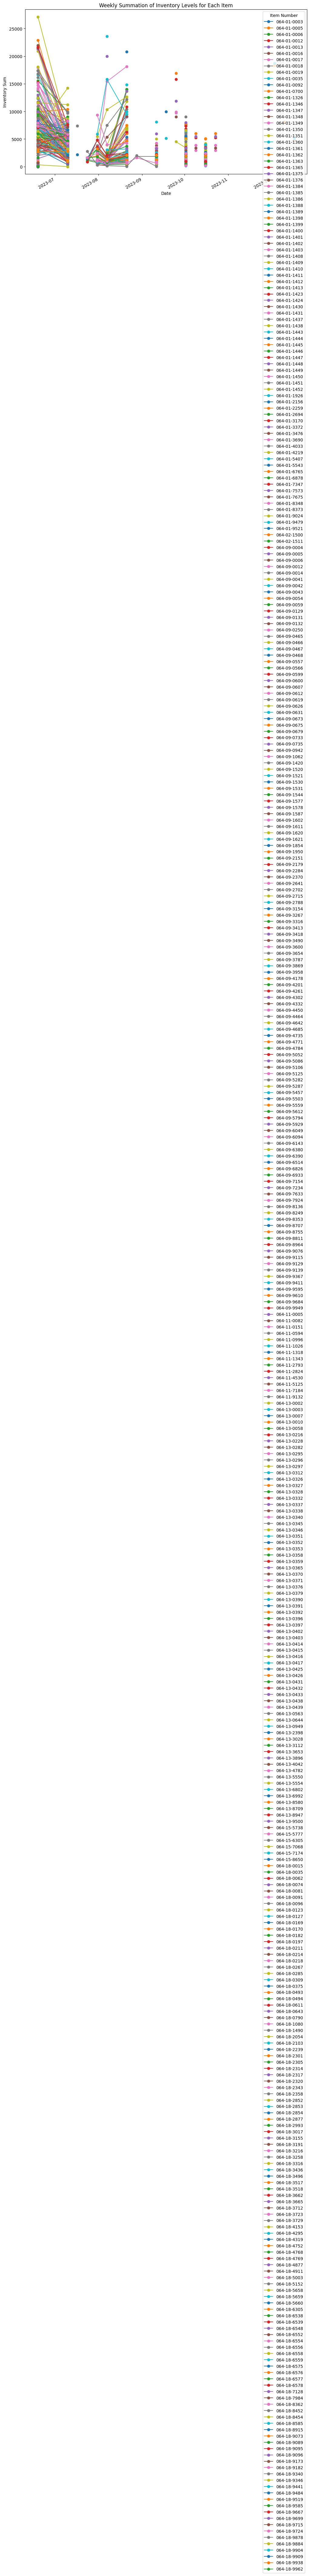

In [113]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the pivot table
pivot_table.T.plot(marker='o', ax=ax)
plt.title('Weekly Summation of Inventory Levels for Each Item')
plt.xlabel('Date')
plt.ylabel('Inventory Sum')
plt.legend(title='Item Number')
plt.show()

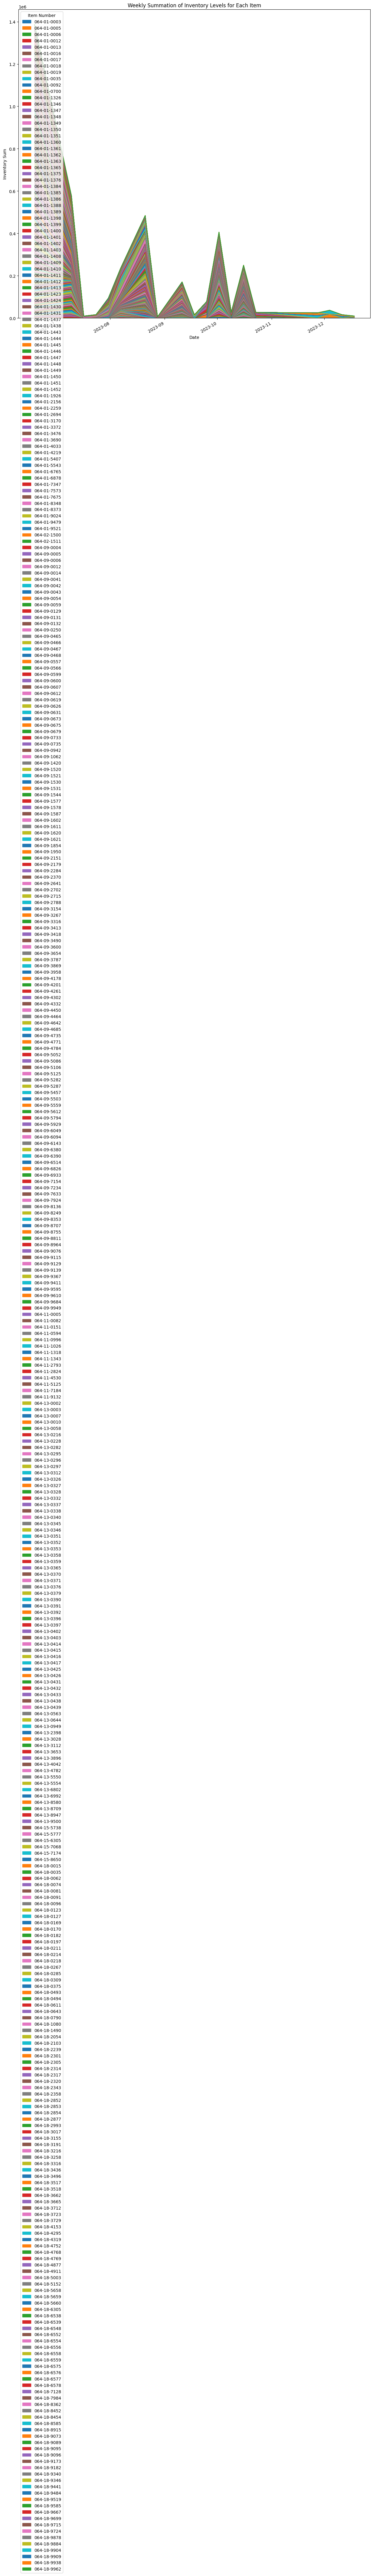

In [114]:
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the pivot table using a stacked area chart
pivot_table.T.plot(kind='area', stacked=True, ax=ax)
plt.title('Weekly Summation of Inventory Levels for Each Item')
plt.xlabel('Date')
plt.ylabel('Inventory Sum')
plt.legend(title='Item Number', loc='upper left')
plt.show()